In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('Iris.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values
df

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2
...,...,...,...,...,...
145,3,67,30,52,23
146,3,63,25,50,19
147,3,65,30,52,20
148,3,62,34,54,23


In [88]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
loo = LeaveOneOut()
loo.get_n_splits(X)

y_true = []
y_pred = []

for train_index, test_index in loo.split(X):    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]     
    lin_svc = LinearSVC().fit(X_train, Y_train)
    y_prediction = lin_svc.predict(X_test)
    y_true.append(Y_test[0])
    y_pred.append(y_prediction[0])
    
y_true = np.array(y_true)
y_pred = np.array(y_pred)
accuracy_score(y_true,y_pred)

0.8933333333333333

it's accuracy is 89% and it means it can predict well

In [101]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

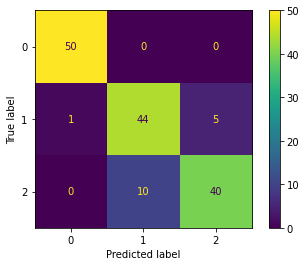

In [102]:
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [103]:
accuracy(cm)

0.8933333333333333

### Result:
as we can see from confusion matrix, our simple model predicted:
* 10 samples with class 2 incorrectly as class 1
* 5 samples with class 1 incorrectly as class 2
but it's overall performance is good due to the fact that it is a simple model.

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [91]:
acc_list = []
error_list = []

for d in range(1, 11):
    pol_svc = SVC(kernel='poly', degree=d).fit(X_train, Y_train)
    acc = pol_svc.score(X_test, Y_test)
    error = 1-acc
    acc_list.append(acc)
    error_list.append(error)
    
error_list = np.array(error_list)

Text(0, 0.5, 'model accuracy')

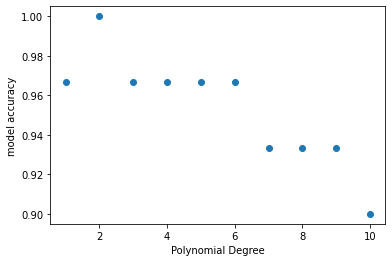

In [96]:
plt.scatter(np.arange(1,11),acc_list)
plt.xlabel("Polynomial Degree")
plt.ylabel("model accuracy")

### Result:
as we can see from above plot, the best accuracy of model is in degree=2

First Best Model's Error: 0.0 at degree: 2


Text(0, 0.5, 'model error')

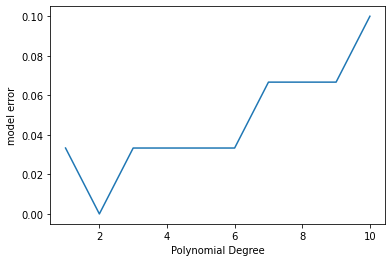

In [97]:
print(f'First Best Model\'s Error: {error_list.min()} at degree: {error_list.argmin() + 1}')
fig, ax = plt.subplots()
ax.plot(
    np.arange(1, 11),
    error_list,
)
plt.xlabel("Polynomial Degree")
plt.ylabel("model error")

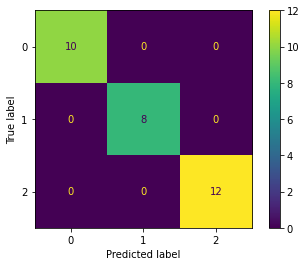

In [104]:
#create model with best degree
pol_svc = SVC(kernel='poly', degree=2).fit(X_train, Y_train)
pol_predictions = pol_svc.predict(X_test)
cm = confusion_matrix(Y_test, pol_predictions)
ConfusionMatrixDisplay(cm).plot()

In [105]:
accuracy(cm)

1.0

## Result:
we can see that with using degree=2, the results in confusion matrix show that our model has benn able to correctly predict classes.
here accuracy is 1 but in previous model accuracy was 0.89

here we don't have any Misclassification.